<div align="center">

## **Project Final Report: Predicting whether a player subscribes to a game-related newsletter based on gender, age, experience and hours played**

</div>

<div align="center">

## **1. Introduction**

</div>

Understanding player engagement is important for planning and managing a game research project. In this study, we investigate which types of players are more likely to subscribe to a game-related newsletter. Subscribing to a newsletter may show a player’s deeper interest in the game and their willingness to stay involved in future updates or events. Knowing which player characteristics and behaviors are linked to subscriptions can help the research team target recruitment efforts and allocate resources more effectively.

To answer this question, we analyze a dataset called `players.csv` through a minecraft server which was collected by a research group in the Computer Science department at the University of British Columbia, led by Frank Wood. The researchers are aiming to collect data about how people play video games. The dataset contains information about each player, such as their age, gender, experience level, total hours played, and whether or not they subscribed to the newsletter. By exploring these features, we aim to identify what makes a player more likely to subscribe and how subscriber and non-subscriber groups differ. This information can help support better decision-making in the game research project.

Our research question is: **`What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?`**

Our specific questions is : **`Which player characteristic, among gender, age, experience and hours played and behaviors, can predict subscription to a game-related newsletter, and how do these features differ between various player types?`**

We have two datasets: players.csv and sessions.csv

### **1) PLAYERS DATA (`players.csv`)**

| Player.csv       | Value |
|-----------------|-------|
| Number of Observations | 196 |
| Number of Variables    | 7   |


| **Variable Name**  | **Data Type**  | **Description**  | **Mean (if applicable)**  | **Standard Deviation** | **Min** | **Max** |
|-------------------|--------------|-----------------|----------------------|--------------------|------|------|
| **experience**    | Character    | 4 types of Player’s experience level: Beginner, Regular, Veteran, Pro | / | / | / | / |
| **subscribe**     | Logical (TRUE/FALSE) | Whether the player subscribed to the game newsletter | / | / | / | / |
| **hashedEmail**   | Character    | Anonymized player email | / | / | / | / |
| **played_hours(hr)**  | Numeric (dbl) | Total hours the player has spent in the game | 5.85 | 28.50 | 0 | 223 |
| **name**         | Character    | Player’s in-game name | / | / | / | / |
| **gender**       | Character    | Player’s gender (Male/Female) | / | / | / | / |
| **Age(year)**          | Integer      | Age of Player | 20.52 | 6.17 | 8 | 50 |



### *Potential Issues (players.csv):*
1. **Missing Values in Age Column**  
   - The `Age` column contains 2 missing values (`NA`).
   - This could affect age-related analysis and might require imputation.
2. **Inconsistent variable name**
   - For consistent, the Age column should be lower case.
3. **Extremely High Standard Deviation (SD) in Played Hours**  
   - The **SD for `played_hours` is 28.50**, meaning playtime varies widely among players.  
   - This suggests that while most players have low playtime, a few have **extremely high values**, making the data highly skewed.
4. **Outliers in `played_hours` and `Age`**  
   - The **max played hours is 223**, which is **significantly higher than the mean (5.85 hr)**, indicating a possible outlier.  
   - These extreme values could **impact modeling results** if not handled properly.


### **2) SESSIONS DATA (`sessions.csv`)**

| sessions.csv      | Value |
|-----------------|-------|
| Number of Observations | 1535 |
| Number of Variables    | 5   |


| **Variable Name**     | **Data Type**  | **Description** | 
|----------------------|---------------|----------------
| `hashedEmail`       | Character | Anonymized player email (used for linking datasets) | 
| `start_time`        | Character | Session start time recorded as a string | 
| `end_time`          | Character | Session end time recorded as a string |
| `original_start_time` | Double (UNIX) | Session start time in UNIX format | 
| `original_end_time`   | Double (UNIX) | Session end time in UNIX format | 

### *Potential Issues (sessions.csv):*
1.**Unrealistic Session Durations**
   - Some session durations may be **too short** (close to 0 minutes), suggesting players exited the game quickly.
   - Some may be **too long** (e.g., exceeding 10 hours), possibly caused by idle time, AFK, or system errors.
     
2.**Missing Values in Session Timestamps**
 - The `end_time` column contains **2 missing values (`NA`)**, meaning some sessions have no recorded end time.

3.**Duplicate Session Records**
   - The dataset contains **235 duplicate rows**, meaning some session records are logged more than once.




To answer this question, we analyze a dataset called `players.csv`, which was collected by a research group in the Computer Science department at the University of British Columbia. The dataset contains information about each player, such as their age, gender, experience level, total hours played, and whether or not they subscribed to the newsletter. By exploring these features, we aim to identify what makes a player more likely to subscribe and how subscriber and non-subscriber groups differ. This information can help support better decision-making in the game research project

### **Response and Explanatory Variables**
- **Response Variable (Dependent Variable)**: `subscribe` (TRUE/FALSE)
- **Explanatory Variables (Independent Variables)**:
  - `played_hours`
  - `Age`
  - `Experience Level`
  - `Gender`

### **How the Data Will Help Answer This Question**
- The dataset contains **player characteristics** (`experience`, `Age`) and **behavioral engagement** (`played_hours`), allowing us to examine how these factors influence subscription rates.  
- We will **group players by experience level** and analyze the **subscription rate within each group**.  
- We will **compare played hours between subscribed and non-subscribed users** to check if higher engagement leads to a higher likelihood of subscribing.  
- Using statistical analysis and visualization, we can determine which factors are most predictive of a player's likelihood to subscribe.  

### **Planned Data Wrangling Steps**
- **Handle missing values**.
- **Remove duplicate records**.
- **Aggregate session data**.
- **Convert categorical variables to factors**.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("patchwork")
library(patchwork)
options(repr.matrix.max.rows = 6) # Makes datasets show up to only 6 observations

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

1.loads data 
2.wrangles and cleans the data to the format necessary for the planned analysis
3.performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
4.creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5.performs the data analysis
6.creates a visualization of the analysis 

### **1)Load Data**

In [4]:
#Read the two datasets
player_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/sessions.csv"
players <- read_csv(player_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### **2)wrangles and cleans the data**

In [7]:
#Check for Duplicate Records for player data
nrow(players) - nrow(distinct(players))

#Check if there is NA value in Variables for session data
colSums(is.na(players))

#Remove NA value
players <- players|>
  filter(!is.na(Age))

#Check again
colSums(is.na(players))

#Check for Duplicate Records for session data
nrow(sessions) - nrow(distinct(sessions))

players <- players |>
    mutate(gender = as_factor(gender),
          subscribe = as_factor(subscribe),
          experience = as_factor(experience ))

library(dplyr)
glimpse(players)
players |> count(experience)

[1] 0

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           0

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           0

[1] 0

Rows: 194
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


experience,n
<fct>,<int>
Pro,13
Veteran,48
Amateur,63
Regular,35
Beginner,35


### **3)Summary of players dataset**

### **PLAYERS DATA (`players.csv`)**

| Player.csv       | Value |
|-----------------|-------|
| Number of Observations | 196 |
| Number of Variables    | 7   |


| **Variable Name**  | **Data Type**  | **Description**  | **Mean (if applicable)**  | **Standard Deviation** | **Min** | **Max** |
|-------------------|--------------|-----------------|----------------------|--------------------|------|------|
| **experience**    | Character    | 4 types of Player’s experience level: Beginner, Regular, Veteran, Pro | / | / | / | / |
| **subscribe**     | Logical (TRUE/FALSE) | Whether the player subscribed to the game newsletter | / | / | / | / |
| **hashedEmail**   | Character    | Anonymized player email | / | / | / | / |
| **played_hours(hr)**  | Numeric (dbl) | Total hours the player has spent in the game | 5.85 | 28.50 | 0 | 223 |
| **name**         | Character    | Player’s in-game name | / | / | / | / |
| **gender**       | Character    | Player’s gender (Male/Female) | / | / | / | / |
| **Age(year)**          | Integer      | Age of Player | 20.52 | 6.17 | 8 | 50 |

In [8]:
library(dplyr)
glimpse(players)

Rows: 194
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


### Visualizations

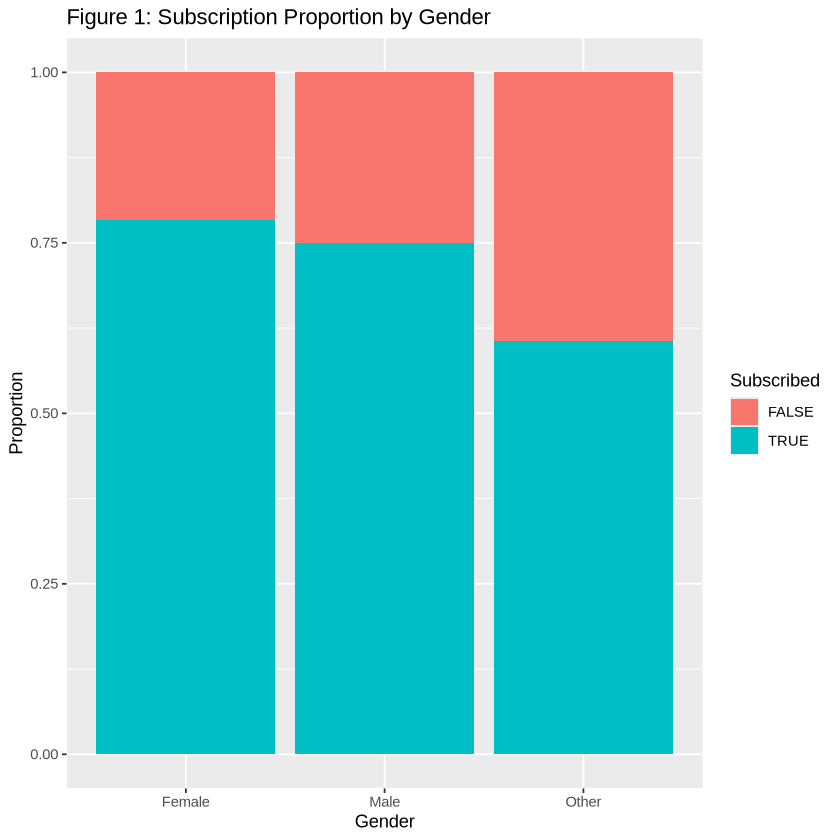

In [9]:
# subscription rate vs Gender
players <- players |> 
  mutate(gender_grouped = case_when(
    str_to_lower(gender) %in% c("male", "m") ~ "Male",
    str_to_lower(gender) %in% c("female", "f") ~ "Female",
    !is.na(gender) ~ "Other",
    TRUE ~ NA_character_))

gender_chart<-ggplot(players, aes(x = gender_grouped, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Figure 1: Subscription Proportion by Gender",
    x = "Gender",
    y = "Proportion",
    fill = "Subscribed")

gender_chart


First, we wanted to see how subscription rates change across different gender groups. For simplicity, we grouped players into Male, Female, and Other. From **Figure 1**, we can see that the subscription rates are not the same for each group. This shows that gender may have some influence on whether a player subscribes or not. Therefore, we used it in our knn model.


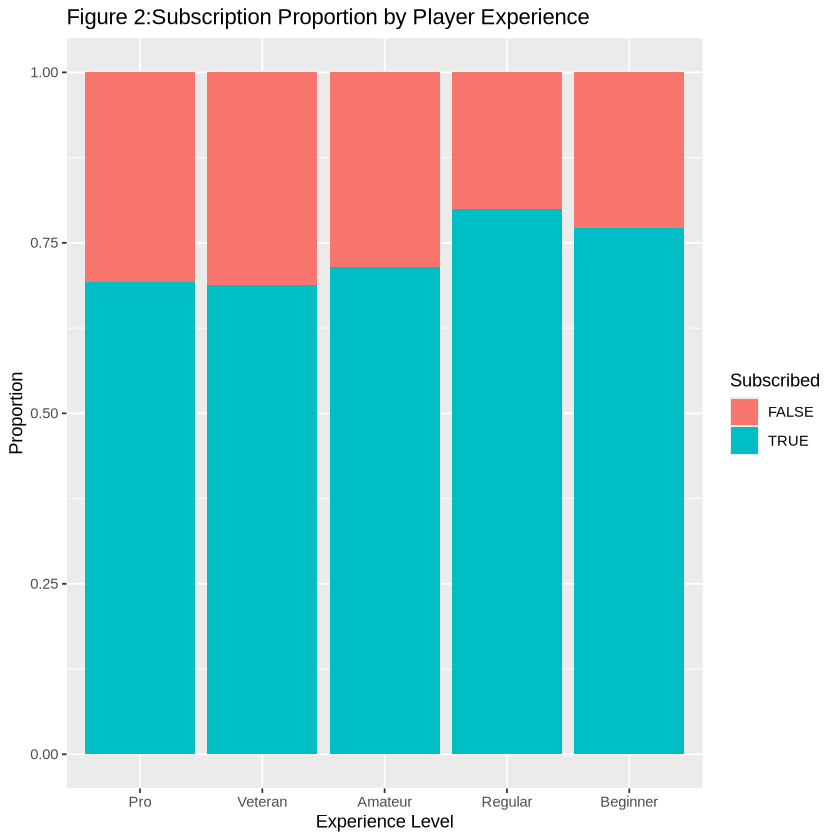

In [10]:
# subscription rate vs Experience level
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Figure 2:Subscription Proportion by Player Experience",
    x = "Experience Level",
    y = "Proportion",
    fill = "Subscribed")



Second, we wanted to know if experience level affects subscription. From **Figure 2**, we can see that subscription rates are slightly different across experience groups. For example, beginners and regular players seem to subscribe more often than pros or veterans. This suggests that less experienced players may be more likely to subscribe, possibly because they are newer to the game and more curious or excited to try it out.


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


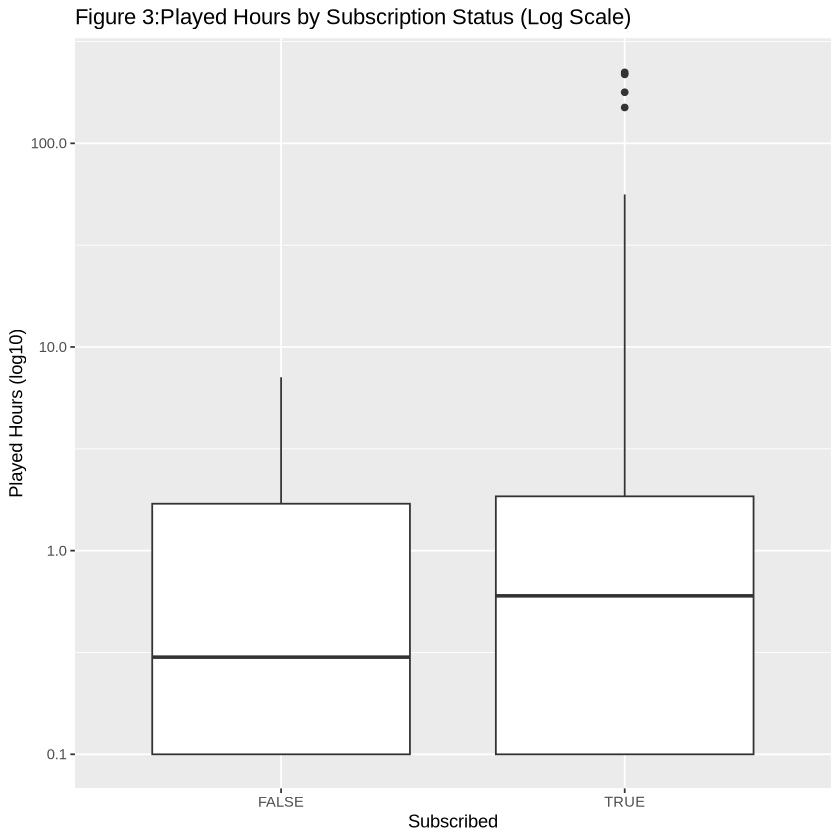

In [11]:
Box_plot_played_hours <- ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(y = "Played Hours (log10)", 
       x = "Subscribed",
       title = "Figure 3:Played Hours by Subscription Status (Log Scale)")

Box_plot_played_hours 


Third, we wanted to see how the amount of time players spend playing affects subscription. In **Figure 3**, we noticed that many players who subscribed had very low played hours, while players with higher played hours did not always subscribe at higher rates. This indicates that subscription is not simply driven by the number of hours played. In fact, a lot of players subscribe even if they barely play the game, which may be due to other reasons such as promotions or curiosity.

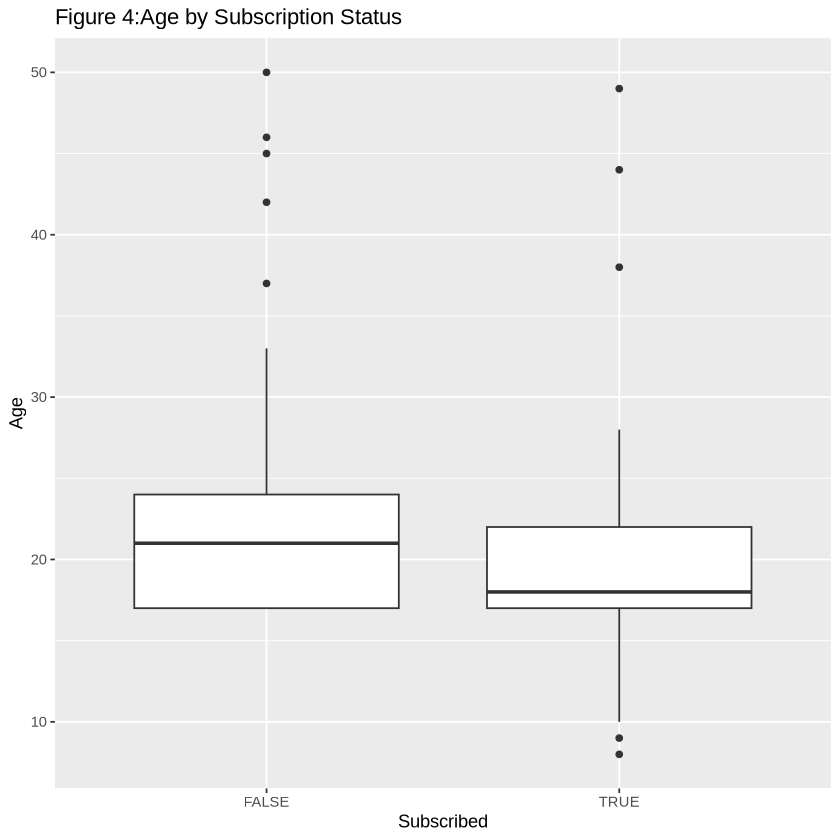

In [12]:
Box_plot_age <- ggplot(players, aes(x = subscribe, y = Age)) +
  geom_boxplot() +
  labs(y = "Age", 
       x = "Subscribed",
       title = "Figure 4:Age by Subscription Status")

Box_plot_age


Fourth, we examined whether age plays a role in subscription behavior. In **Figure 4**, the data shows a trend where subscription rates differ across age groups. For example, younger players may subscribe more often than older ones, or vice versa. This suggests that age could influence subscription decisions, perhaps because different age groups have varying interests or levels of engagement with the game.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


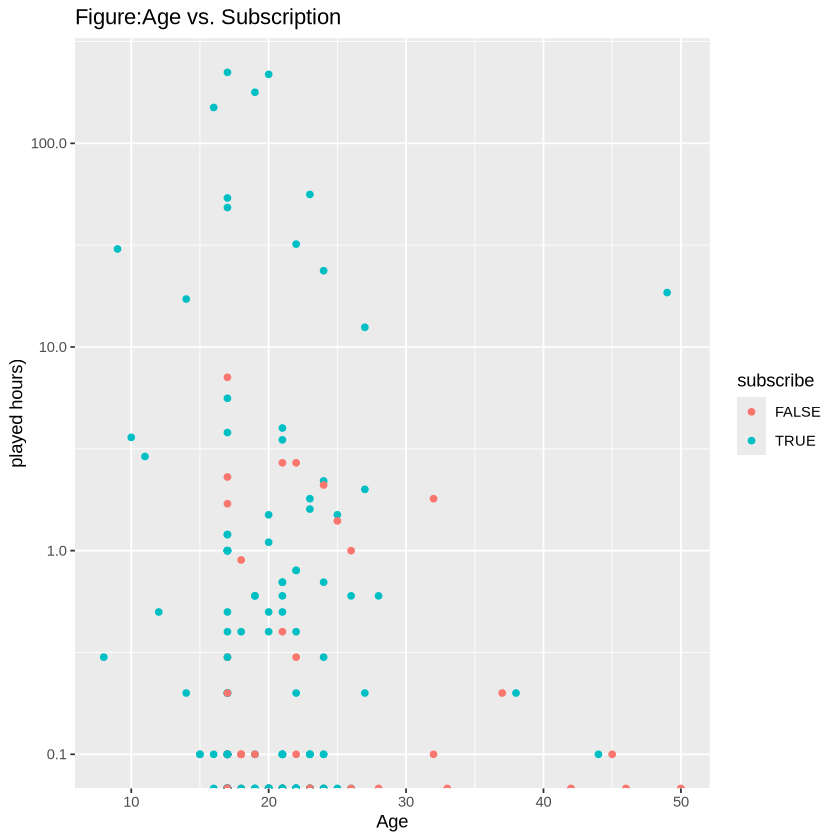

In [13]:
#age vs played_hours
distribution<-ggplot(players,
       aes(x = Age, y = played_hours,color=subscribe	)) +
  geom_point() +
  scale_y_log10()+#log
 labs(
    title = "Figure:Age vs. Subscription",
    x = "Age",
    y = "played hours)")
distribution


In [14]:
players |> 
  mutate(played_any = played_hours > 0) |>
  count(played_any, subscribe)

played_any,subscribe,n
<lgl>,<fct>,<int>
FALSE,FALSE,27
FALSE,TRUE,58
TRUE,FALSE,25
TRUE,TRUE,84


While exploring the data, we discovered that many players subscribed without playing the game. In fact, 58 players subscribed even though their play time was **zero**. This number is larger than the group who didn’t play and didn’t subscribe (27). This made it harder for our model to find clear patterns, because we expected people to play first and then subscribe. We think these players might have subscribed for reasons outside the game, such as rewards or curiosity.

<div align="center">

## **2. Methods & Results**

</div>

### Forward Selection

In [15]:
set.seed(1)
library(tidymodels)

# Step 1: Clean and prepare data
players_clean <- players |>
  select(subscribe, Age, gender, played_hours, experience) |>
  mutate(
    gender = case_when(
      gender == "Male" ~ "Male",
      gender == "Female" ~ "Female",
      TRUE ~ "Other"
    ),
    gender = as.factor(gender),
    experience = as.factor(experience),
    subscribe = as.factor(subscribe)
  )

# Step 2: Extract all feature names (excluding target)
all_features <- colnames(players_clean |> select(-subscribe))

# Step 3: Create tibble to store results
accuracies <- tibble(
  size = integer(),
  model_string = character(),
  accuracy = numeric()
)

# Step 4: Set up KNN model spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Step 5: 5-fold cross-validation object
players_vfold <- vfold_cv(players_clean, v = 5, strata = subscribe)

# Step 6: Forward selection loop
selected <- c()
remaining <- all_features

for (i in 1:length(all_features)) {
  accs <- list()
  models <- list()
  
  for (j in 1:length(remaining)) {
    test_feature <- remaining[j]
    current_features <- c(selected, test_feature)
    
    model_string <- paste("subscribe ~", paste(current_features, collapse = "+"))
    
    rec <- recipe(as.formula(model_string), data = players_clean) |>
      step_dummy(all_nominal_predictors()) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
    
    wf <- workflow() |>
      add_recipe(rec) |>
      add_model(knn_spec)
    
    set.seed(123)
    res <- tune_grid(
      wf,
      resamples = players_vfold,
      grid = 5,
      metrics = metric_set(yardstick::accuracy)
    )
    
    best_acc <- res |>
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      summarize(mx = max(mean)) |>
      pull(mx)
    
    accs[[j]] <- best_acc
    models[[j]] <- model_string
  }
  
  best_j <- which.max(unlist(accs))
  selected <- selected |> append(remaining[best_j])
  remaining <- remaining[-best_j]
  
  accuracies <- accuracies |>
    add_row(
      size = i,
      model_string = models[[best_j]],
      accuracy = round(unlist(accs)[best_j], 3)
    )
}

# Step 7: Print final output
accuracies


size,model_string,accuracy
<int>,<chr>,<dbl>
1,subscribe ~ Age,0.747
2,subscribe ~ Age+played_hours,0.737
3,subscribe ~ Age+played_hours+gender,0.726
4,subscribe ~ Age+played_hours+gender+experience,0.707


### Data Analysis

In [16]:
set.seed(1)
library(themis)

players<- players|>
    mutate(subscribe=as_factor(subscribe))

# Splitting the data into a training set and a testing set
players_split <- initial_split(players, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

# Making a recipe and specification
players_recipe <- recipe(subscribe ~ Age + played_hours+experience+gender, data = players_train) |>
   step_scale(Age,played_hours) |>
   step_center(Age,played_hours)|>
   step_dummy(all_nominal_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
players_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6152709,5,0.04043012,Preprocessor1_Model01
1,roc_auc,binary,0.5362554,5,0.05306597,Preprocessor1_Model01
2,accuracy,binary,0.5800493,5,0.02610140,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,roc_auc,binary,0.6206130,5,0.045765369,Preprocessor1_Model29
30,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model30
30,roc_auc,binary,0.6125116,5,0.045164522,Preprocessor1_Model30


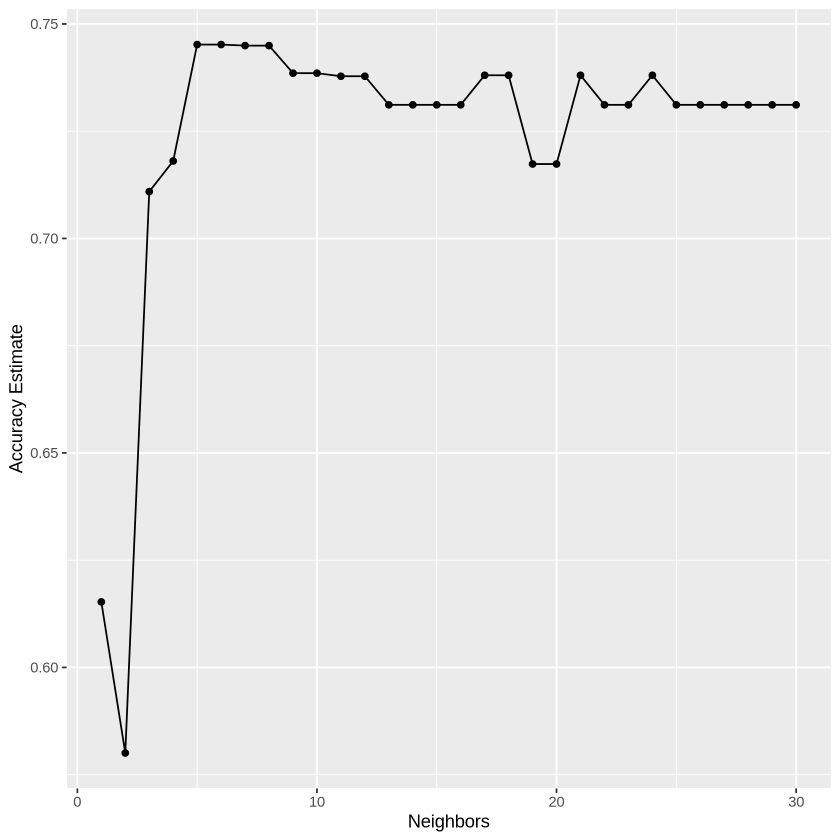

In [17]:
set.seed(1)

# Performing cross-validation on the training data with 5  folds
vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# Choosing the k values for which we want to see the accuracy
# We chose 1 to 15 because we thought that this could be a big enough variety to observe the best k, if one exists
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Extracting the metrics from the workflow
players_metrics <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()
players_metrics

# Getting the accuracies
accuracy <- players_metrics |>
    filter(.metric == "accuracy")

# Plotting the k values for each number of neighbors from 1 to 15
cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate")

cross_val_plot

In [18]:
set.seed(1)
# Making sure that the maximum that we see on the graph above is the same as the actual maximum
best_k <- accuracy |>
    slice_max(mean) |>
    select(neighbors) |>
    pull()
best_k

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k)) |>
    set_engine("kknn") |>
    set_mode("classification")

[1] 5 6

In [19]:
set.seed(1)
#build the model
players_spec <- nearest_neighbor(weight_func = "rectangular",
                               neighbors = 5)|>
    set_engine("kknn")|>
    set_mode("classification")

players_fit<- workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec)|>
    fit(data=players_train)

#test by using final model
player_predictions<- predict(players_fit,players_test)|>
    bind_cols(players_test)

players_metrics <- player_predictions|>
    metrics(truth=subscribe, estimate=.pred_class)

players_conf_mat <- player_predictions|>
    conf_mat(truth=subscribe, estimate=.pred_class)

players_metrics 
players_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7551020
kap,binary,0.1671388


          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE     11   35

At first, we thought that players who spent more time playing the game would be more likely to subscribe. So we used played_hours as one of the main features in our model. But later, we noticed something interesting — many players who subscribed didn’t play at all. This made the model confused and led to poor results.

<div align="center">

## **3. Discussion:**

</div>

To answer the question:

**"What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**

we used a method called **K-Nearest Neighbors (K-NN)**.

We looked at **four player features**:
- **Age**
- **Gender**
- **Played Hours**
- **Experience Level**

These features helped us understand who is more likely to subscribe to the newsletter.

We used a process called **forward selection**. This means we started with no predictors and added one at a time, checking which one improved the model the most. We used **5-fold cross-validation** to test how well our model worked each time.

Since **Gender** and **Experience Level** are not numbers, we changed them into numbers using a step called **`step_dummy()`**. We also **scaled and centered** all the features to make sure K-NN worked properly, since it uses distance to compare players.

By doing this, we were able to:
- Build a good prediction model.
- **Find out which features matter most** for predicting subscriptions.
- **Compare how different player types behave**.

This helped us understand which player characteristics really make a difference when it comes to subscribing.


We also tried using experience, gender, and age to see if they could help. After testing different combinations, we found that using all four features gave us the best results. The accuracy went up, and the model was finally able to predict both TRUE and FALSE subscriptions.